In [ ]:
# 'Hide' warning
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Selanjutnya, karena pengerjaan dilakukan di Google Colab, untuk memudahkan maka *dataset* diletakkan di Google Drive sehingga perlu mengakses melalui Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Setelah mengkonfigurasi akses Google Drive maka dapat menentukan path dataset untuk kemudian di-load ke dalam notebook. Setelah itu dilanjutkan dengan melihat beberapa data untuk mendapat gambaran awal dari keadaan dataset.

In [ ]:
# Specify the dataset path in Drive folder
dataset_url = "/content/drive/My Drive/PDB/Tutorial/Dataset/Penerbangan.csv"

# Read the dataset
df = pd.read_csv(dataset_url)

df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


Selanjutnya dapat dilihat mengenai tipe data masing-masing kolom. Dapat diketahui bahwa beberapa kolom sudah bertipe numerik, namun masih ada yang bertipe kategorikal (string object) sehingga akan perlu dilakukan konversi terlebih dahulu. Terlihat juga data berjumlah 103904 entries, namun tampak ada satu kolom yang jumlah non-null count-nya berbeda yang mengindikasikan nilai NaN.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Setelah dicek, ternyata kolom `Arrival Delay in Minutes` memiliki nilai NaN dengan jumlah 310 entries.

In [ ]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Setelah dilihat, jumlah nilai NaN yang ada memiliki persentase *~0.012%* dari keseluruhan data.

In [ ]:
def null_percentage(dataframe):
  # percentage of missing data (NaN)
  print((dataframe.isnull().sum().sum()/np.product(dataframe.shape)) * 100)

null_percentage(df)

0.011934093008931322


Setelah itu coba dilihat mengenai statistik deskriptif sederhana dari masing-masing kolom yang bertipe data numerik. Beberapa kolom kategorikal juga termasuk di dalam karena kategorinya sudah dalam bentuk numerik. 

In [ ]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Mencoba melihat visualisasi *boxplot* dari kolom yang mengandung nilai NaN, yaitu `Arrival Delay in Minutes`. Dari gambar terlihat terdapat *outlier* pada kolom ini.

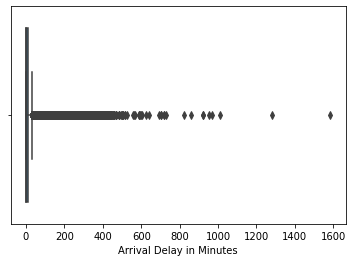

In [ ]:
sns.boxplot(x=df['Arrival Delay in Minutes'])

Selanjutnya dilakukan pengecekan nilai unik masing-masing kolom.`Age`, `Flight Distance`, `Departure Delay in Minutes`, dan `Arrival Delay in Minutes`.

In [ ]:
df.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

Untuk menghadapi nilai NaN, karena yang memiliki nilai NaN hanya di kolom `Arrival Delay in Minutes` yang bertipe numerik *continuous*, serta memiliki *outlier* pada data dalam kolom, maka kemudian dicoba melakukan mengisi data NaN dengan nilai *median* pada masing-masing atribut yang memiliki nilai NaN.

In [ ]:
df['Arrival Delay in Minutes'].fillna((df['Arrival Delay in Minutes'].median()), inplace=True)

In [ ]:
print(df.shape)
null_percentage(df)

(103904, 25)
0.0


Cek lagi untuk memastikan tidak ada yang di-drop dan tidak ada lagi nilai NaN.

Menyiapkan *backup* dari data sebelumnya untuk kebutuhan nantinya dengan cara menggandakan datasetnya sebelum melakukan *preprocessing* data kategorikal

In [ ]:
df_fill_ori = df.copy()

Setelah dataset digandakan, maka tahapan *preprocessing* dapat dimulai.

In [ ]:
from sklearn import preprocessing #library untuk pra pemrosesan data kategorik ke numerik
le = preprocessing.LabelEncoder()
cat_feat = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for column in cat_feat: #mendefinisikan data pada kolom apa saja yang akan di transform ke numerik
  df[column] = le.fit_transform(df[column])
df.info() #setelah melakukan pra pemrosesan, semua datakategorikal telah berubah menjadi data numerik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  int64  
 3   Customer Type                      103904 non-null  int64  
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  int64  
 6   Class                              103904 non-null  int64  
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Selanjutnya, untuk menentukan apa yang ingin dilakukan maka dilihat matriks korelasi antar fitur. Berdasarkan matriks ini, akhirnya diputuskan untuk task yang akan dilakukan adalah melakukan prediksi terhadap fitur `Stay`. Selain itu, bisa dilihat hubungannya dengan fitur lainnya memang tidak seluruhnya berkorelasi kuat namun dapat diseleksi beberapa fitur yang berkorelasi paling tinggi dengan fitur ini. Fitur itu antara lain fitur `Hospital_type_code`, `Available Extra Rooms in Hospital`, `Department`, `Ward_Type`, `Type of Admission`, `Severity of Illness`, `Visitors with Patient`, `Age` dan `Admission_Deposit`.

Selanjutnya akan dilakukan analisis korelasi. Analisis korelasi bertujuan untuk melihat pengaruh/keterkaitan antara variabel/fitur. Di tahap ini akan dipetakan fitur-fitur yang ada pada dataset yang ada ke dalam visualisasi *heatmap*.

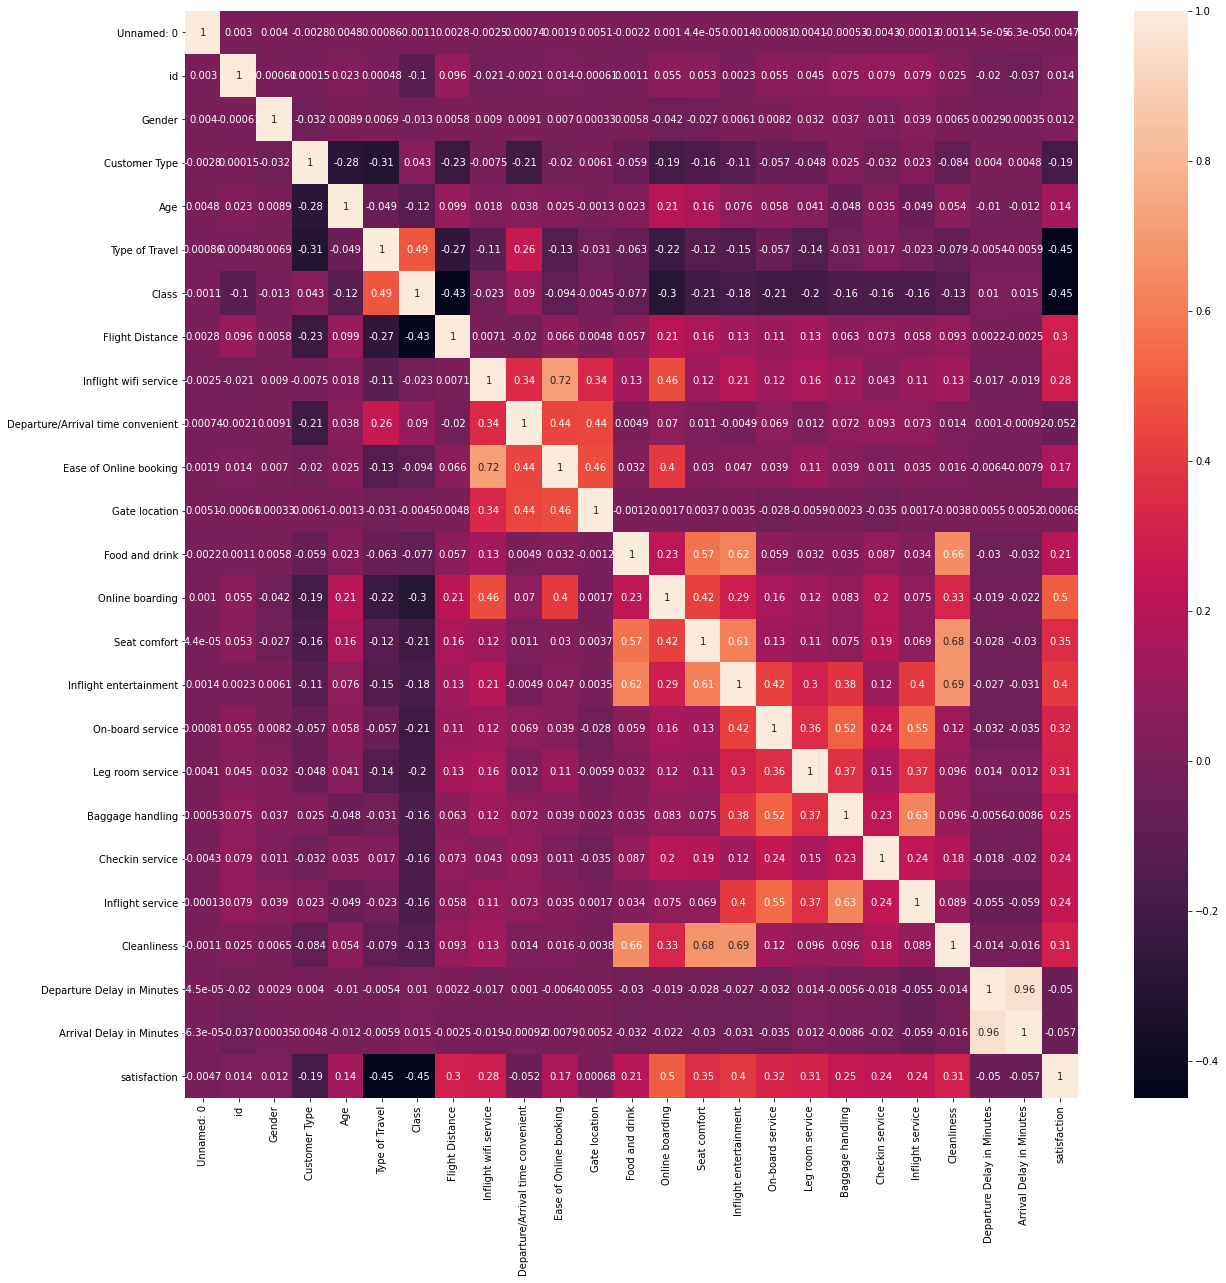

In [ ]:
fig=plt.gcf()
fig.set_size_inches(20, 20)
sns.heatmap(data = df.corr(), annot=True, cbar=True)

Setelah dilihat, fitur `satisfaction` memiliki banyak korelasi yang paling baik di antara fitur-fitur lainnya yang ada, sehingga selanjutnya kita akan menggunakan `satisfaction` sebagai label.

In [ ]:
cor_target = abs(df.corr()["satisfaction"]) #memilih fitur yang memiliki nilai korelasi tinggi
relevant_features = cor_target[cor_target>0.3]
relevant_features

Type of Travel            0.449000
Class                     0.449321
Online boarding           0.503557
Seat comfort              0.349459
Inflight entertainment    0.398059
On-board service          0.322383
Leg room service          0.313131
Cleanliness               0.305198
satisfaction              1.000000
Name: satisfaction, dtype: float64

Seperti yang terlihat, terdapat beberapa fitur seperti `Type of Travel`, `Class`, `Online boarding`, `Seat comfort`, `Inflight entertainment`, `On-board service`, `Leg room service`, dan `Cleanliness`  yang memiliki nilai korelasi yang tinggi terhadap `satisfaction`. Selanjutnya akan dilihat nilai korelasi antara masing-masing fitur yang sudah dipilih terhadap fitur yang lainnya.

In [ ]:
print(df[["Type of Travel","Class","Online boarding","Seat comfort",
               "Inflight entertainment","On-board service","Leg room service",
               "Cleanliness"]].corr(method="pearson"))

                        Type of Travel     Class  ...  Leg room service  Cleanliness
Type of Travel                1.000000  0.487088  ...         -0.138803    -0.079207
Class                         0.487088  1.000000  ...         -0.197321    -0.125988
Online boarding              -0.224803 -0.297062  ...          0.123950     0.331517
Seat comfort                 -0.124399 -0.210158  ...          0.105559     0.678534
Inflight entertainment       -0.148199 -0.179028  ...          0.299692     0.691815
On-board service             -0.056543 -0.207748  ...          0.355495     0.123220
Leg room service             -0.138803 -0.197321  ...          1.000000     0.096370
Cleanliness                  -0.079207 -0.125988  ...          0.096370     1.000000

[8 rows x 8 columns]


Selanjutnya akan masuk ke bagian pembagian data menjadi *training set* dan *test set*, dengan komposisi 80%:20%.

In [ ]:
data_df = df[["Type of Travel","Class","Online boarding","Seat comfort",
               "Inflight entertainment","On-board service","Leg room service",
               "Cleanliness"]]

res = df["satisfaction"] # sebagai target untuk data latih

In [ ]:
from sklearn.model_selection import train_test_split #library untuk memisahkan data menjadi data latih dan data uji

#test_size 0.20 artinya data dipisah 80% sebagai data latih 20% untuk data uji
train_x, test_x, train_y, test_y = train_test_split(data_df,res,test_size=0.20) 

Selanjutnya akan dilakukan pembangunan model. Akan dicoba dua model yaitu XGBoost dengan cross-validation 10-fold, serta SVM tanpa cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(train_x, train_y)

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, train_x, train_y, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.89


In [ ]:
from sklearn import svm #library svm
clf = svm.SVC(gamma='scale')
clf.fit(train_x.to_numpy(),train_y.to_numpy())

pred_y = clf.predict(test_x.to_numpy())
print(pred_y)

[0 1 0 ... 0 0 1]


In [ ]:
pred_y = clf.predict(test_x)
print(pred_y)

[0 1 0 ... 0 0 1]


In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y,pred_y)
print(score)

0.9008228670420095


              precision    recall  f1-score   support

           0       0.90      0.93      0.91     11755
           1       0.91      0.86      0.88      9026

    accuracy                           0.90     20781
   macro avg       0.90      0.90      0.90     20781
weighted avg       0.90      0.90      0.90     20781



Text(33.0, 0.5, 'Expected')

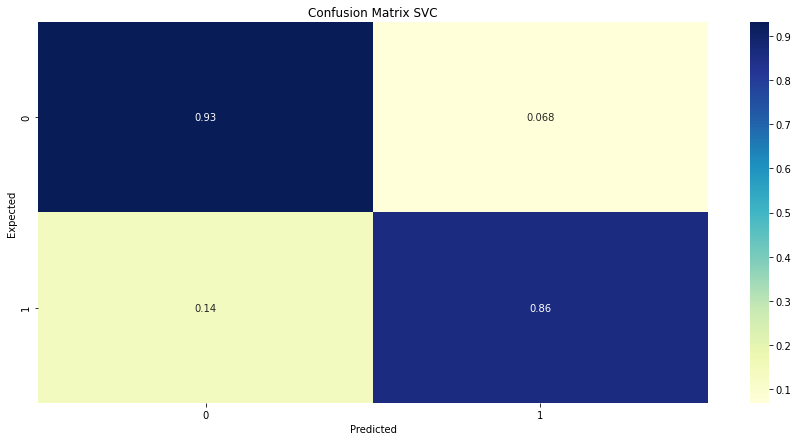

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(test_y, pred_y))
conf_mat = confusion_matrix(y_true=test_y, y_pred=pred_y)
conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
cmat = pd.DataFrame(conf_mat)
sns.heatmap(cmat,cmap="YlGnBu", annot=True)
fig=plt.gcf()
fig.set_size_inches(15, 7)
plt.title("Confusion Matrix SVC")
plt.xlabel('Predicted')
plt.ylabel('Expected')

In [ ]:
pred_y_xgbc = xgbc.predict(test_x)
score_xgbc = accuracy_score(test_y,pred_y_xgbc)
print(score_xgbc)

0.8961551417159905


              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11755
           1       0.90      0.85      0.88      9026

    accuracy                           0.90     20781
   macro avg       0.90      0.89      0.89     20781
weighted avg       0.90      0.90      0.90     20781



Text(33.0, 0.5, 'Expected')

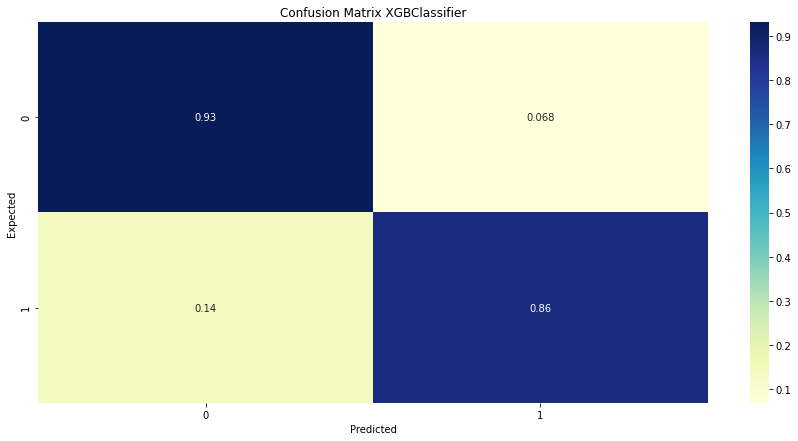

In [ ]:
print(classification_report(test_y, pred_y_xgbc))
conf_mat_xgbc = confusion_matrix(y_true=test_y, y_pred=pred_y_xgbc)
conf_mat_xgbc = conf_mat_xgbc.astype('float') / conf_mat_xgbc.sum(axis=1)[:, np.newaxis]
cmat_xgbc = pd.DataFrame(conf_mat_xgbc)
sns.heatmap(cmat,cmap="YlGnBu", annot=True)
fig=plt.gcf()
fig.set_size_inches(15, 7)
plt.title("Confusion Matrix XGBClassifier")
plt.xlabel('Predicted')
plt.ylabel('Expected')

Setelah dievaluasi, terlihat bahwa dua skenario pembangunan model antara XGBoost dengan SVM hampir setara performanya untuk klasifikasi kali ini, dengan SVM sedikit lebih unggul (sekitar 0.1%) dibandingkan XGBoost. Selain itu, dari confusion matrix juga dapat dilihat hampir identik performanya dengan menghasilkan nilai yang sudah relatif baik (antara 89%-90%).

Selanjutnya akan masuk ke bagian Penskalaan Fitur (Dimension Reduction).

Sebelum masuk ke tahap reduksi dimensi, akan dilakukan normalisasi terlebih dahulu terhadap dataset dengan metode yang digunakan yaitu `standard_scaler`.

In [ ]:
standard_scale = preprocessing.StandardScaler()

data_standard = standard_scale.fit_transform(df) #disini kita gunakan dataset yang sudah di transform ke numerik

df_standard = pd.DataFrame(data_standard, columns=df.columns)

Setelah dinormalisasi maka akan dilakukan reduksi dimensi menggunakan PCA menjadi 2 dimensi.

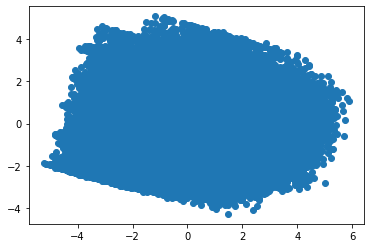

In [ ]:
from sklearn.decomposition import PCA #library untuk reduksi dimensi
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_standard)
plt.scatter(pca_df[:,0], pca_df[:,1])

Setelah melakukan beberapa teknik pemrosesan data, maka dapat dicoba dilakukan clustering terhadap dataset. Pada tutorial kali ini akan digunakan metode K-Means.

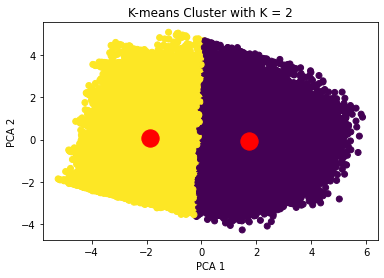

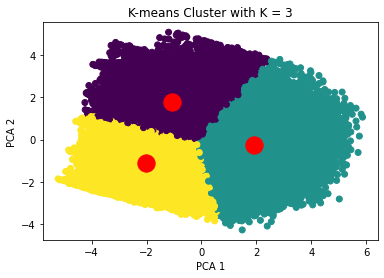

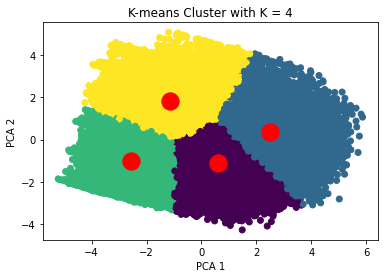

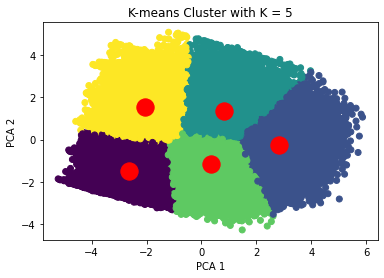

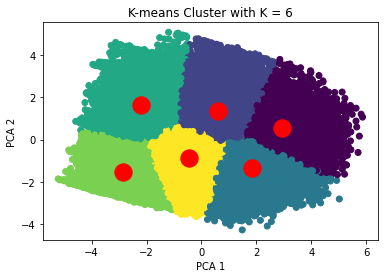

In [ ]:
from sklearn.cluster import KMeans

for num_clusters in range(2, 7):
 kmeans = KMeans(n_clusters=num_clusters)
 clusters = kmeans.fit_predict(pca_df)
 plt.scatter(pca_df[:, 0], pca_df[:,1], c=clusters)
 plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
 plt.title('K-means Cluster with K = {}'.format(num_clusters))
 plt.xlabel('PCA 1')
 plt.ylabel('PCA 2')
 plt.show()

Setelah mendapatkan prediksi model hasil clustering, selanjutnya akan dievaluasi tingkat keberhasilan clustering telah dilakukan dengan menggunakan salah satu metrics clustering yaitu uji silhouette score yang cocok dengan metode K-Means yang diimplementasikan sebelumnya. Pada tahap ini dilakukan proses penghitungan nilai uji silhouette dengan meng-append hasil uji dari jumlah 2 klaster sampai 10 klaster.

In [ ]:
from sklearn.metrics import silhouette_score #library uji kecocokan hasil klister

def calculate_SI(pca):
  k_range = range(2, 10)
  scores = []
  for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(pca)
    scores.append(silhouette_score(pca, km.labels_))
  
  # plot the results
  plt.plot(k_range, scores)
  plt.xlabel('Jumlah Klaster')
  plt.ylabel('Silhouette Coefficient')
  plt.grid(True)
  print(scores)

Setelah didefinisikan, maka penghitungan evaluasi hasil uji silhouette dari masing-masing klaster dapat dimulai.

[0.12586504365466558, 0.10543737843388251, 0.09418540078724062, 0.1003974898762993, 0.10261816018249784, 0.10962230222546693, 0.11091978415348948, 0.10823035744681789]
CPU times: user 21min 12s, sys: 1min 16s, total: 22min 29s
Wall time: 17min 30s


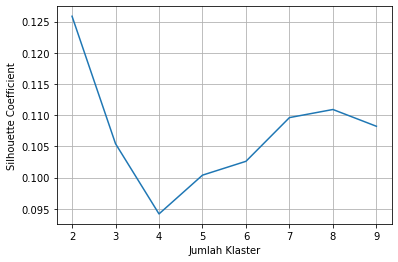

In [ ]:
%%time
calculate_SI(df_standard)

Berdasarkan grafik nilai hasil uji silhouette di atas, dapat dilihat bahwa jumlah klaster yang dapat dibentuk yang paling optimal untuk dataset `Penerbangan.csv` ini adalah dua klaster, dengan nilai silhouette coefficient maksimum saat jumlah klaster = 2 yaitu ~0.126.